### <font color='red'>Noise Removal from image</font>

<font color='red' font-size= 60px>Overview</font>—Denoising images contaminated by the mixture of additive whiteGaussian noise (AWGN) and impulse noise (IN) is an essential but challenging problem. The presence of impulsive disturbances inevitably affects the distributionof noises and thus largely degrades the performance of traditional AWGN denoisers.Deep learning techniques have received much attention in the area of image denoising. However, there are substantial differences in the various types of deep learning methods dealing with image denoising.I first try to use the already existing deep convolutional neural networks (CNNs) for additive white noisy images and then try to build a architecture proposed in a research paper[9]. Due to the huge difference of noise distribution, the result of a mixture of multiple noises becomes very complicated. When the mixed noise is very strong, most denoiser methods often produce a lot of artifacts. In order to solve the above problems, I consider a research work based on residual learning for the removal of AWGN-IN noisers. By training,  model proposed in the research paper can obtain stable nonlinear mapping from the images with mixed noise to the clean images. After a series of experiments under different noise settings, I will try to measure the performance of this model.

<font color='red'>How deep learning can be applied:</font> We can train a convolution neural network to learn the noise distribution with the help of multiple noisy images and later this noisy part can help us to get the original image. I will try the architecture proposed in the paper[9] to deal with it.

<font color='red'>Measuring metrics:</font><br>
<font color='blue'>PSNR:</font>The PSNR block computes the peak signal-to-noise ratio, in decibels, between two images. This ratio is used as a quality measurement between the original and a compressed image. The higher the PSNR, the better the quality of the compressed, or reconstructed image.

The mean-square error (MSE) and the peak signal-to-noise ratio (PSNR) are used to compare image compression quality. The MSE represents the cumulative squared error between the compressed and the original image, whereas PSNR represents a measure of the peak error. The lower the value of MSE, the lower the error.

To compute the PSNR, the block first calculates the mean-squared error using the following equation:
<img src="psnr.png" alt="MSE">
In the previous equation, M and N are the number of rows and columns in the input images. Then the block computes the PSNR using the following equation:
<img src="psnr1.png" alt="PSNR">
In the previous equation, R is the maximum fluctuation in the input image data type. For example, if the input image has a double-precision floating-point data type, then R is 1. If it has an 8-bit unsigned integer data type, R is 255, etc.


<font color='blue'>SSIM:</font> is a method for predicting the perceived quality of digital television and cinematic pictures, as well as other kinds of digital images and videos. SSIM is used for measuring the similarity between two images. The SSIM index is a full reference metric; in other words, the measurement or prediction of image quality is based on an initial uncompressed or distortion-free image as reference.
<img src="ssim.png" alt="PSNR">


In [ ]:
import os,glob,shutil,re
from tqdm.notebook import tqdm
import numpy as np
from keras.preprocessing.image import array_to_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img
import matplotlib.pyplot as plt
import tensorflow as tf
from skimage.metrics import peak_signal_noise_ratio
from skimage.metrics import structural_similarity

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/noise_clean_data')

### Types of noise

<ol>
<li>
blind noise: blind noise denotes noise of unknown types</li>
<li>additive white noise :
Additive white Gaussian noise (AWGN) is a basic noise model used in information theory to mimic the effect of many random processes that occur in nature. The modifiers denote specific characteristics:

Additive because it is added to any noise that might be intrinsic to the information system.
Gaussian because it has a normal distribution in the time domain with an average time domain value of zero.
<li>impulse noise:Impulse noise replaces some of the pixels in the original image. Two types of impulse noise are very well known; 
<ul><li>the first one is salt-and pepper noise, which takes only one of the following two values[0,255].</li> 
<li>The other type is random-valued impulse noise, which may take any value in the range of [0–255]. </li></ul>
   
Thus, it is difficult to differentiate between the original values and the random-valued impulse noise because both cover
the same range
<li>speckle noise:speckle noise is the grainy salt-andpepper pattern present in radar imagery</li>
<li>noise of different distributions: noise pattern may follow different distribution like poisson and uniform etc.</li>
</ol>

Data I have considered here is from real world data. Noise that occur in the real world . It can follow any kind of noise distribution

### Source of data:<br>
##### https://ani.stat.fsu.edu/~abarbu/Renoir.html

Renoir data set is a collection of total 120 noise,clean image sets. For each clean images ,noise images at different levels are taken so data size crosses more than 120 .<br>
Many consumer cameras and mobile phones deal with the issues of low-light noise due to small sensor size and insufficient exposure time. The issue of noise for a particular digital camera is so important that it is used as a valuable metric of the camera sensor and for comparing camera performance.
Images are taken from 3 different cameras are taken

<b>1)Canon PowerShot S90 <br>
2)Canon EOS Rebel T3i  </br>
3)mobile phone camera (Xiaomi Mi3) </b></br>

### Acquisition procedure <br>
All the images in this dataset are of static scenes and are acquired under low-light conditions using the following ”sandwich” procedure:<br>
• A low-noise image is obtained with low light sensitivity (ISO 100) and long
exposure time. This will be the reference image.<br>
• One or two noisy images are then obtained with increased light sensitivity and
reduced exposure time.<br>
• Finally, another low noise image is taken with the same parameters as the reference image. This will be the clean image<br>

<b>4)NIND dataset</b>
https://commons.wikimedia.org/wiki/Natural_Image_Noise_Dataset


I have merged all the data taken from 3 different cameras in two folders train_images and train_noisy images respectively and moved part of it to test_clean and test_noise images set to form the test dataset

### number of data points in train and test

In [ ]:
train_images_y=os.listdir('dataset/resized_train_clean/')
train_images_x=os.listdir('dataset/resized_train_noisy/')
print('length of train data clean =',len(train_images_y))
print('length of train data noisy =',len(train_images_x))

length of train data clean = 633
length of train data noisy = 633


In [ ]:
test_images_y=os.listdir('dataset/resized_test_clean/')
test_images_x=os.listdir('dataset/resized_test_noisy/')
print('length of test data clean =',len(test_images_y))
print('length of test data noisy =',len(test_images_x))

length of test data clean = 8
length of test data noisy = 8


### original image size and length

Image Size : Image size is 3000 cross 3000 . This is not ideal for training and increases training time. we will resize it to 300 cross 300 in the preprocessing part.

In [ ]:
array_image=img_to_array(image1)

In [ ]:
array_image.shape

(3000, 3000, 3)

We have 3000 pixel width and 3000 pixel height and 3 channels indicate that it is a color image.

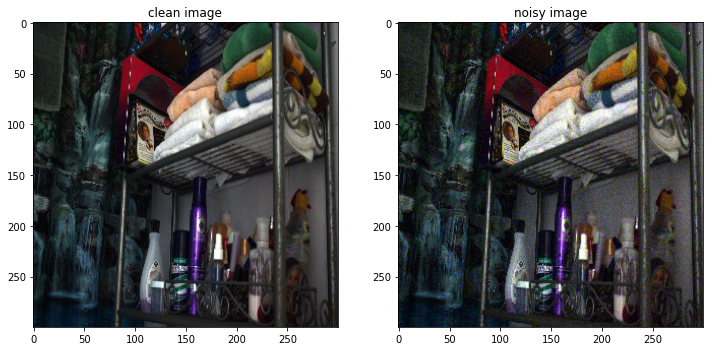

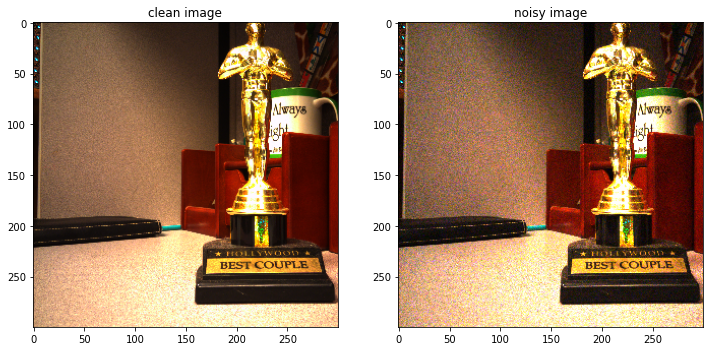

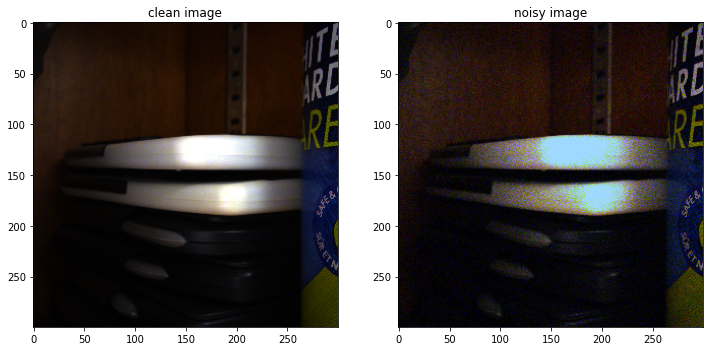

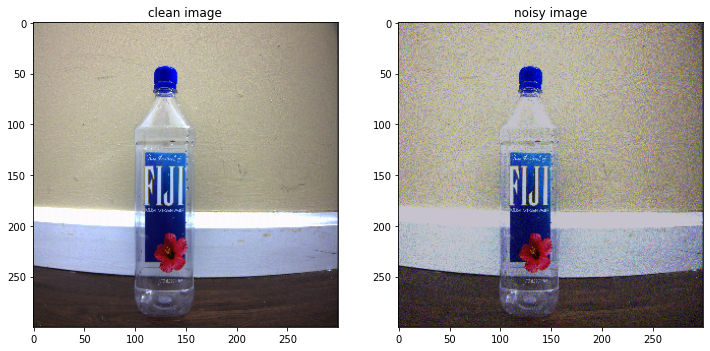

In [ ]:
for ran in np.random.randint(0,200,4):
  image_clean=load_img('dataset/train_clean/clean'+str(ran)+'.bmp',target_size=(300,300)) 
  image_noise=load_img('dataset/train_noisy/noisy'+str(ran)+'.bmp',target_size=(300,300)) 
  plt.figure(figsize=(12, 6))
  plt.subplot(121)
  plt.title('clean image')
  plt.imshow(image_clean)

  plt.subplot(122)
  plt.title('noisy image')
  plt.imshow(image_noise)

### PSNR and SSIM values of sample noisy and clean images 

In [ ]:
image_clean=img_to_array(load_img('dataset/train_clean/clean'+str(32)+'.bmp',target_size=(300,300))) 
image_noise=img_to_array(load_img('dataset/train_noisy/noisy'+str(32)+'.bmp',target_size=(300,300)))
print('PSNR of random noisy and cleam images is ')
tf.print(tf.image.psnr(image_clean,image_noise,255))
print('SSIM of ranodm noisy and cleam images is ')
tf.print(tf.image.ssim(image_clean,image_noise,255))

PSNR of random noisy and cleam images is 
31.8647537
SSIM of ranodm noisy and cleam images is 
0.664003313


In [ ]:
image_clean=img_to_array(load_img('dataset/train_clean/clean'+str(93)+'.bmp',target_size=(300,300))) 
image_noise=img_to_array(load_img('dataset/train_noisy/noisy'+str(93)+'.bmp',target_size=(300,300)))
print('PSNR of random noisy and cleam images is ')
tf.print(tf.image.psnr(image_clean,image_noise,255))
print('SSIM of ranodm noisy and cleam images is ')
tf.print(tf.image.ssim(image_clean,image_noise,255))

PSNR of random noisy and cleam images is 
33.2288322
SSIM of ranodm noisy and cleam images is 
0.84253788


In [ ]:
image_clean=img_to_array(load_img('dataset/train_clean/clean'+str(150)+'.bmp',target_size=(300,300))) 
image_noise=img_to_array(load_img('dataset/train_noisy/noisy'+str(150)+'.bmp',target_size=(300,300)))
print('PSNR of random noisy and cleam images is ')
tf.print(tf.image.psnr(image_clean,image_noise,255))
print('SSIM of ranodm noisy and cleam images is ')
tf.print(tf.image.ssim(image_clean,image_noise,255))

PSNR of random noisy and cleam images is 
26.2502
SSIM of ranodm noisy and cleam images is 
0.522072494


### Resizing the training and test data to 300*300 size 

In [ ]:
os.mkdir('resized_test_clean')
os.mkdir('resized_test_noisy')

In [ ]:
for img in tqdm(os.listdir('dataset/resized_train_clean')):
  clean_image=img_to_array(load_img('dataset/resized_train_clean/'+img,target_size=(256,256),interpolation='bicubic'))
  #noisy_image=img_to_array(load_img('dataset/train_noisy/noisy'+str(i)+'.bmp',target_size=(300,300),interpolation='bicubic'))
  save_img('dataset/resized_train_clean/'+img,clean_image)
  #save_img('dataset/resized_train_noisy/noisy'+str(i)+'.bmp',noisy_image)

In [ ]:
for img in tqdm(os.listdir('dataset/resized_train_noisy')):
  #clean_image=img_to_array(load_img('dataset/train_clean/'+img,target_size=(300,300),interpolation='bicubic'))
  noisy_image=img_to_array(load_img('dataset/resized_train_noisy/'+img,target_size=(256,256),interpolation='bicubic'))
  #save_img('dataset/resized_train_clean/'+img,clean_image)
  save_img('dataset/resized_train_noisy/'+img,noisy_image)

In [ ]:
for img in tqdm(os.listdir('dataset/resized_test_noisy')):
  #clean_image=img_to_array(load_img('dataset/train_clean/'+img,target_size=(300,300),interpolation='bicubic'))
  noisy_image=img_to_array(load_img('dataset/resized_test_noisy/'+img,target_size=(256,256),interpolation='bicubic'))
  #save_img('dataset/resized_train_clean/'+img,clean_image)
  save_img('dataset/resized_test_noisy/'+img,noisy_image)

In [ ]:
for img in tqdm(os.listdir('dataset/resized_test_clean')):
  #clean_image=img_to_array(load_img('dataset/train_clean/'+img,target_size=(300,300),interpolation='bicubic'))
  noisy_image=img_to_array(load_img('dataset/resized_test_clean/'+img,target_size=(256,256),interpolation='bicubic'))
  #save_img('dataset/resized_train_clean/'+img,clean_image)
  save_img('dataset/resized_test_clean/'+img,noisy_image)

#### Referances

[1]https://towardsdatascience.com/what-library-can-load-image-in-python-and-what-are-their-difference-d1628c6623ad
[2]https://it.mathworks.com/matlabcentral/answers/196214-how-to-add-salt-and-pepper-noise-in-the-color-image-in-its-all-bands
[3]https://www.cambridgeincolour.com/tutorials/image-interpolation.htm
[4]https://www.cambridgeincolour.com/tutorials/image-interpolation.htm
[5]https://www.geeksforgeeks.org/add-a-salt-and-pepper-noise-to-an-image-with-python/
[6]https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/
[7]https://www.mathworks.com/help/vision/ref/psnr.html#:~:text=Vision%20Toolbox%20%2F%20Statistics-,Description,the%20compressed%2C%20or%20reconstructed%20image.
[8]https://en.wikipedia.org/wiki/Structural_similarity<br>
[9]Mixed Noise Removal by Residual Learning of Deep CNN Kang Yang1, Jielin Jiang and Zhaoqing Pan